# Aula 09 (22/09/2023)

# Problemas do Caminho Mínimo e Fluxo Máximo

## Questão 1

Uma pessoa está atrasada para o trabalho e quer dirigir na maior velocidade possível sem ser parado pela polícia. Na rede abaixo os pesos são as probabilidades de ser parado pela polícia. Encontre o caminho com a menor probabilidade da pessoa ser parada pela polícia.

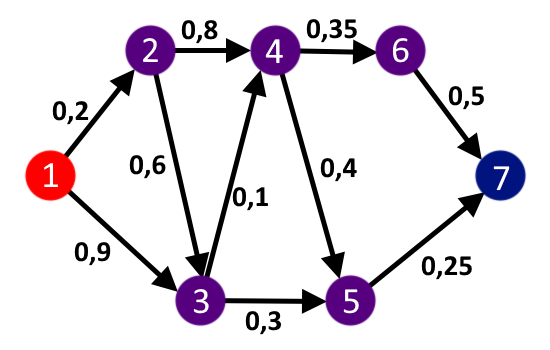

*Solução:*

Como é de interesse reduzir as chances de ser parado, temos um problema de caminho mínimo.

Em `Julia`:

In [1]:
# Bibliotecas a serem usadas
using JuMP, GLPK

In [2]:
# Número de nós e seus tipos
nodes = 1:7
b=[-1,0,0,0,0,0,1]

# Inícios e fins dos 7 caminhos
start_node = [1,1, 2,2, 3,3, 4,4, 5, 6]
end_node = [2,3, 3,4, 4,5, 5,6, 7, 7]

# Custos associados aos caminhos
c=[0.2,0.9, 0.6,0.8, 0.1,0.3, 0.4,0.35, 0.25, 0.5]

# Caminhos
links = Tuple( (start_node[i], end_node[i]) for i in 1:length(start_node) )
c_dict = Dict(links .=> c)

links

((1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 7), (6, 7))

In [3]:
# Modelo
model = Model(GLPK.Optimizer)

# Variáveis (caminhos)
@variable(model, 0<= x[link in links])

# Função objetivo 
@objective(model, Min, sum(c_dict[link] * x[link] for link in links))

# Custos dos caminhos
for i in nodes
   @constraint(model, -sum(x[(ii,j)] for (ii,j) in links if ii==i)
                   + sum(x[(j,ii)] for (j,ii) in links if ii==i) == b[i])
end

# Descrição do modelo
println(model)

Min 0.2 x[(1, 2)] + 0.9 x[(1, 3)] + 0.6 x[(2, 3)] + 0.8 x[(2, 4)] + 0.1 x[(3, 4)] + 0.3 x[(3, 5)] + 0.4 x[(4, 5)] + 0.35 x[(4, 6)] + 0.25 x[(5, 7)] + 0.5 x[(6, 7)]
Subject to
 -x[(1, 2)] - x[(1, 3)] == -1
 x[(1, 2)] - x[(2, 3)] - x[(2, 4)] == 0
 x[(1, 3)] + x[(2, 3)] - x[(3, 4)] - x[(3, 5)] == 0
 x[(2, 4)] + x[(3, 4)] - x[(4, 5)] - x[(4, 6)] == 0
 x[(3, 5)] + x[(4, 5)] - x[(5, 7)] == 0
 x[(4, 6)] - x[(6, 7)] == 0
 x[(5, 7)] + x[(6, 7)] == 1
 x[(1, 2)] >= 0
 x[(1, 3)] >= 0
 x[(2, 3)] >= 0
 x[(2, 4)] >= 0
 x[(3, 4)] >= 0
 x[(3, 5)] >= 0
 x[(4, 5)] >= 0
 x[(4, 6)] >= 0
 x[(5, 7)] >= 0
 x[(6, 7)] >= 0



In [4]:
# Otimização do modelo
JuMP.optimize!(model)
obj = JuMP.objective_value(model)

# Caminho do custo mínimo
# println("Função Objetivo: FO=", obj)
for link in links
  println("Valor de x",link," = ",value(x[link]))
end

Valor de x(1, 2) = 1.0
Valor de x(1, 3) = 0.0
Valor de x(2, 3) = 1.0
Valor de x(2, 4) = 0.0
Valor de x(3, 4) = 0.0
Valor de x(3, 5) = 1.0
Valor de x(4, 5) = 0.0
Valor de x(4, 6) = 0.0
Valor de x(5, 7) = 1.0
Valor de x(6, 7) = 0.0


Ou seja, a solução ótima é:

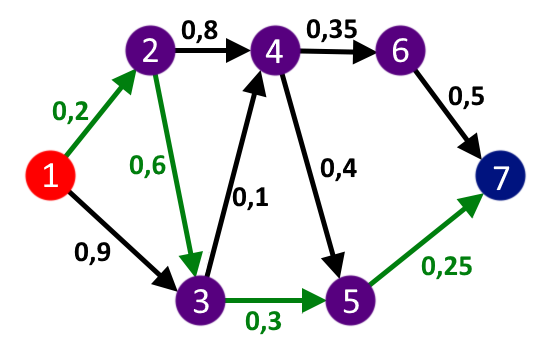

# Problema do Transporte

## Questão 1

Uma grande empresa industrial chegou à conclusão de que deve fabricar 3 novos produtos. Atualmente existem 5 filiais com capacidade de produção. A tabela abaixo fornece as informações necessárias:

| Filiais/Produtos | 1 | 2 | 3 | Capacidade |
|:---:|:---:|:---:|:---:|:---:|
| 1 | 90 | 62 | 76 | 2000 |
| 2 | 82 | 58 | 70 | 3000 |
| 3 | 92 | 64 | 80 | 2000 |
| 4 | 84 | 56 | 75 | 3000 |
| 5 | 86 | 58 | 72 | 5000 |
| Demanda | 5000 | 3000 | 4000 | - |

*Solução:*

Como a capacidade total é de 15000 unidades e a demanda total é de 12000 unidades, temos um caso de problema do transporte desbalanceado. Ou seja, ao expressar a situação como problema de programação linear, será preciso gerar um nó *dummy* que representa um produto de demanda igual a 3000 unidades.

**Observação:** o valor ótimo da função objetivo depende do custo dos arcos associados ao nó *dummy*.

Em `Julia`:

In [5]:
# Capacidades e demandas
b=[2000,3000,2000,3000,5000, 5000,3000,4000,3000]

# Nós iniciais e finais dos arcos
start_node = [1,1,1,1, 2,2,2,2, 3,3,3,3, 4,4,4,4, 5,5,5,5]
end_node = [6,7,8,9, 6,7,8,9, 6,7,8,9, 6,7,8,9, 6,7,8,9]

# Custos dos arcos
c=[90,62,76,500, 82,58,70,500, 92,64,80,500, 84,56,75,500, 86,58,72,500]

# Arcos
links = Tuple( (start_node[i], end_node[i]) for i in 1:length(end_node) )
c_dict = Dict(links .=> c)
links

((1, 6), (1, 7), (1, 8), (1, 9), (2, 6), (2, 7), (2, 8), (2, 9), (3, 6), (3, 7), (3, 8), (3, 9), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9))

In [6]:
# Modelo
model = Model(GLPK.Optimizer)

# Variáveis
@variable(model, x[link in links]>=0)

# Função objetivo
@objective(model, Min, sum(c_dict[link] * x[link] for link in links))

# Restrições de capacidade (filiais)
for i in 1:5
   @constraint(model, sum(x[(ii,j)] for (ii,j) in links if ii==i) == b[i])
end
# Restrições de demandas (produtos)
for j in 6:9
   @constraint(model, sum(x[(i,jj)] for (i,jj) in links if jj==j) == b[j])
end

# Descrição do  modelo
println(model)

Min 90 x[(1, 6)] + 62 x[(1, 7)] + 76 x[(1, 8)] + 500 x[(1, 9)] + 82 x[(2, 6)] + 58 x[(2, 7)] + 70 x[(2, 8)] + 500 x[(2, 9)] + 92 x[(3, 6)] + 64 x[(3, 7)] + 80 x[(3, 8)] + 500 x[(3, 9)] + 84 x[(4, 6)] + 56 x[(4, 7)] + 75 x[(4, 8)] + 500 x[(4, 9)] + 86 x[(5, 6)] + 58 x[(5, 7)] + 72 x[(5, 8)] + 500 x[(5, 9)]
Subject to
 x[(1, 6)] + x[(1, 7)] + x[(1, 8)] + x[(1, 9)] == 2000
 x[(2, 6)] + x[(2, 7)] + x[(2, 8)] + x[(2, 9)] == 3000
 x[(3, 6)] + x[(3, 7)] + x[(3, 8)] + x[(3, 9)] == 2000
 x[(4, 6)] + x[(4, 7)] + x[(4, 8)] + x[(4, 9)] == 3000
 x[(5, 6)] + x[(5, 7)] + x[(5, 8)] + x[(5, 9)] == 5000
 x[(1, 6)] + x[(2, 6)] + x[(3, 6)] + x[(4, 6)] + x[(5, 6)] == 5000
 x[(1, 7)] + x[(2, 7)] + x[(3, 7)] + x[(4, 7)] + x[(5, 7)] == 3000
 x[(1, 8)] + x[(2, 8)] + x[(3, 8)] + x[(4, 8)] + x[(5, 8)] == 4000
 x[(1, 9)] + x[(2, 9)] + x[(3, 9)] + x[(4, 9)] + x[(5, 9)] == 3000
 x[(1, 6)] >= 0
 x[(1, 7)] >= 0
 x[(1, 8)] >= 0
 x[(1, 9)] >= 0
 x[(2, 6)] >= 0
 x[(2, 7)] >= 0
 x[(2, 8)] >= 0
 x[(2, 9)] >= 0
 x[(3, 6)] 

In [7]:
# Otimização do modelo
optimize!(model)
obj = objective_value(model)

# Resultados
println("Função Objetivo: FO=", obj)

capac = ["1", "2", "3", "dummy"]
for i in 1:5
    for j in 1:4
        println("Filial ",i," e produto ",capac[j],": ",value(x[(i,j+5)]))
    end
end

Função Objetivo: FO=2.378e6
Filial 1 e produto 1: 1000.0
Filial 1 e produto 2: 0.0
Filial 1 e produto 3: 0.0
Filial 1 e produto dummy: 1000.0
Filial 2 e produto 1: 3000.0
Filial 2 e produto 2: 0.0
Filial 2 e produto 3: 0.0
Filial 2 e produto dummy: 0.0
Filial 3 e produto 1: 0.0
Filial 3 e produto 2: 0.0
Filial 3 e produto 3: 0.0
Filial 3 e produto dummy: 2000.0
Filial 4 e produto 1: 0.0
Filial 4 e produto 2: 3000.0
Filial 4 e produto 3: 0.0
Filial 4 e produto dummy: 0.0
Filial 5 e produto 1: 1000.0
Filial 5 e produto 2: 0.0
Filial 5 e produto 3: 4000.0
Filial 5 e produto dummy: 0.0


Ou seja, a solução ótima é:

|| Produto 1 | Produto 2 | Produto 3 | Produto *dummy* |
|:---:|:---:|:---:|:---:|:---:|
| Filial 1 | 1000 | 0 | 0 | 1000 |
| Filial 2 | 3000 | 0 | 0 | 0 |
| Filial 3 | 0 | 0 | 0 | 2000 |
| Filial 4 | 0 | 3000 | 0 | 0 |
| Filial 5 | 1000 | 0 | 4000 | 0 |

## Questão 2

Uma vinícola do sul de Santa Catarina possui 3 fábricas e 3 armazéns nos quais os
vinhos são envelhecidos. Como as fábricas e os armazéns estão localizados em
diferentes locais do estado, a empresa deseja saber quantos tonéis de vinho deve enviar
de cada fábrica para cada armazém de forma a minimizar o seu custo de transporte.

| Fábricas/Armazéns | 1 | 2 | 3 | Capacidade |
|:---:|:---:|:---:|:---:|:---:|
| 1 | 20 | 16 | 24 | 300 |
| 2 | 10 | 10 | 8 | 400 |
| 3 | 12 | 18 | 10 | 200 |
| Demanda | 300 | 400 | 300 | - |

*Solução:*

Como a capacidade total é de 900 tonéis de vinho a demanda total é de 1000, temos um caso de problema do transporte desbalanceado. Ou seja, ao expressar a situação como um problema de programação linear, será preciso gerar um nó *dummy* que representa uma fábrica de capacidade igual a 100 tonéis.

Em `Julia`:

In [8]:
# Capacidades e demandas
b=[300,400,200,100, 300,400,300]

# Nós iniciais e de destino dos arcos
start_node = [1,1,1, 2,2,2, 3,3,3, 4,4,4]
end_node = [5,6,7, 5,6,7, 5,6,7, 5,6,7]

# Custos dos arcos
c=[20,16,24, 10,10,8, 12,18,10, 50,50,50]

# Arcos
links = Tuple( (start_node[i], end_node[i]) for i in 1:length(end_node) )
c_dict = Dict(links .=> c)
links

((1, 5), (1, 6), (1, 7), (2, 5), (2, 6), (2, 7), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7))

In [9]:
# Modelo
model = Model(GLPK.Optimizer)

# Variáveis
@variable(model, x[link in links]>=0)

# Função objetivo
@objective(model, Min, sum(c_dict[link] * x[link] for link in links))

# Restrições de capacidade (fábricas)
for i in 1:4
   @constraint(model, sum(x[(ii,j)] for (ii,j) in links if ii==i) == b[i])
end
# Restrições de demandas (armazéns)
for j in 5:6
   @constraint(model, sum(x[(i,jj)] for (i,jj) in links if jj==j) == b[j])
end

# Descrição do  modelo
println(model)

Min 20 x[(1, 5)] + 16 x[(1, 6)] + 24 x[(1, 7)] + 10 x[(2, 5)] + 10 x[(2, 6)] + 8 x[(2, 7)] + 12 x[(3, 5)] + 18 x[(3, 6)] + 10 x[(3, 7)] + 50 x[(4, 5)] + 50 x[(4, 6)] + 50 x[(4, 7)]
Subject to
 x[(1, 5)] + x[(1, 6)] + x[(1, 7)] == 300
 x[(2, 5)] + x[(2, 6)] + x[(2, 7)] == 400
 x[(3, 5)] + x[(3, 6)] + x[(3, 7)] == 200
 x[(4, 5)] + x[(4, 6)] + x[(4, 7)] == 100
 x[(1, 5)] + x[(2, 5)] + x[(3, 5)] + x[(4, 5)] == 300
 x[(1, 6)] + x[(2, 6)] + x[(3, 6)] + x[(4, 6)] == 400
 x[(1, 5)] >= 0
 x[(1, 6)] >= 0
 x[(1, 7)] >= 0
 x[(2, 5)] >= 0
 x[(2, 6)] >= 0
 x[(2, 7)] >= 0
 x[(3, 5)] >= 0
 x[(3, 6)] >= 0
 x[(3, 7)] >= 0
 x[(4, 5)] >= 0
 x[(4, 6)] >= 0
 x[(4, 7)] >= 0



In [10]:
# Otimização do modelo
optimize!(model)
obj = objective_value(model)

# Resultados
println("Função Objetivo: FO=", obj)

deman = ["1","2","3","dummy"]
for i in 1:4
    for j in 1:3
        println("Fábrica ",deman[i]," e armazém ",j,": ",value(x[(i,j+4)]))
    end
end

Função Objetivo: FO=15600.0
Fábrica 1 e armazém 1: 0.0
Fábrica 1 e armazém 2: 300.0
Fábrica 1 e armazém 3: 0.0
Fábrica 2 e armazém 1: 200.0
Fábrica 2 e armazém 2: 100.0
Fábrica 2 e armazém 3: 100.0
Fábrica 3 e armazém 1: 0.0
Fábrica 3 e armazém 2: 0.0
Fábrica 3 e armazém 3: 200.0
Fábrica dummy e armazém 1: 100.0
Fábrica dummy e armazém 2: 0.0
Fábrica dummy e armazém 3: 0.0


Ou seja, a solução ótima é:

| | Armazém 1 | Armazém 2 | Armazém 3 |
|:---:|:---:|:---:|:---:|
| Fábrica 1 | 0 | 300 | 0 |
| Fábrica 2 | 200 | 100 | 100 |
| Fábrica 3 | 0 | 0 | 200 |
| Fábrica *dummy* | 100 | 0 | 0 |

## Questão 3

Uma empresa tem 3 fábricas: uma em Los Angeles, uma em Detroit e outra em Nova
Orleans e duas grandes centrais de distribuição: uma em Denver e outra em Miami.
Maiores informações encontram-se na tabela abaixo. Modele o problema de forma a
minimizar o custo de transporte da produção de carros das fábricas até os centros de
distribuição:

| Fábricas/Centros | Denver | Miami | Capacidades |
|:---:|:---:|:---:|:---:|
| Los Angeles | 80 | 215 | 1000 |
| Detroit | 100 | 108 | 1400 |
| Miami | 102 | 68 | 1000 |
| Demanda | 2300 | 1400 | -|

*Solução:*

Como a capacidade total é de 3400 unidades e a demanda total é de 3700 unidades, temos um caso de problema do transporte desbalanceado. Ou seja, ao expressar a situação como problema de programação linear, será preciso gerar um nó *dummy* que representa uma filial de capacidade igual a 300 unidades.

Em `Julia`:

In [11]:
# Capacidades e demandas
b=[1000,1400,1000,300, 2300,1400]

# Nós iniciais e de destino dos arcos
start_node = [1,1, 2,2, 3,3, 4,4]
end_node = [5,6, 5,6, 5,6, 5,6]

# Custos dos arcos
c=[80,215, 100,108, 102,68, 500,500]

# Arcos
links = Tuple( (start_node[i], end_node[i]) for i in 1:length(end_node) )
c_dict = Dict(links .=> c)
links

Dict{Tuple{Int64, Int64}, Int64} with 8 entries:
  (4, 5) => 500
  (2, 5) => 100
  (3, 6) => 68
  (1, 6) => 215
  (4, 6) => 500
  (3, 5) => 102
  (1, 5) => 80
  (2, 6) => 108

In [12]:
# Modelo
model = Model(GLPK.Optimizer)

# Variáveis
@variable(model, x[link in links]>=0)

# Função objetivo
@objective(model, Min, sum(c_dict[link] * x[link] for link in links))

# Restrições de capacidade
for i in 1:4
   @constraint(model, sum(x[(ii,j)] for (ii,j) in links if ii==i) == b[i])
end
# Restrições de demandas
for j in 5:6
   @constraint(model, sum(x[(i,jj)] for (i,jj) in links if jj==j) == b[j])
end

# Descrição do  modelo
println(model)

Min 80 x[(1, 5)] + 215 x[(1, 6)] + 100 x[(2, 5)] + 108 x[(2, 6)] + 102 x[(3, 5)] + 68 x[(3, 6)] + 500 x[(4, 5)] + 500 x[(4, 6)]
Subject to
 x[(1, 5)] + x[(1, 6)] == 1000
 x[(2, 5)] + x[(2, 6)] == 1400
 x[(3, 5)] + x[(3, 6)] == 1000
 x[(4, 5)] + x[(4, 6)] == 300
 x[(1, 5)] + x[(2, 5)] + x[(3, 5)] + x[(4, 5)] == 2300
 x[(1, 6)] + x[(2, 6)] + x[(3, 6)] + x[(4, 6)] == 1400
 x[(1, 5)] >= 0
 x[(1, 6)] >= 0
 x[(2, 5)] >= 0
 x[(2, 6)] >= 0
 x[(3, 5)] >= 0
 x[(3, 6)] >= 0
 x[(4, 5)] >= 0
 x[(4, 6)] >= 0



In [13]:
# Otimização do modelo
optimize!(model)
obj = objective_value(model)

# Resultados
println("Função Objetivo: FO=", obj)

capac = ["de Los Angeles", "de Detroit", "de Miami", "dummy"]
deman = ["Denver", "Miami"]

for i in 1:4
    for j in 1:2
        println("Fábrica ",capac[i]," e armazém de ",deman[j],": ",value(x[(i,j+4)]))
    end
end

Função Objetivo: FO=438800.0
Fábrica de Los Angeles e armazém de Denver: 1000.0
Fábrica de Los Angeles e armazém de Miami: 0.0
Fábrica de Detroit e armazém de Denver: 1300.0
Fábrica de Detroit e armazém de Miami: 100.0
Fábrica de Miami e armazém de Denver: 0.0
Fábrica de Miami e armazém de Miami: 1000.0
Fábrica dummy e armazém de Denver: 0.0
Fábrica dummy e armazém de Miami: 300.0


Ou seja, a solução ótima é:

|  | Armazém em Denver | Armazém em Miami |
|:--:|:--:|:--:|
| Fábrica em Los Angeles | 1000 | 0 |
| Fábrica em Detroit | 1300 | 100 |
| Fábrica em Miami | 0 | 1000 |
| Fábrica *dummy* | 0 | 300 |

## Questão 4

Três pomares fornecem caixas de laranjas a quatro varejistas. As informações encontram-se na tabela abaixo. Modele como um problema de transporte.

| Pomares/Varejistas | 1 | 2 | 3 | 4 | Capacidade |
|:---:|:---:|:---:|:---:|:---:|:---:|
| 1 | 1 | 2 | 3 | 2 | 250 |
| 2 | 2 | 4 | 1 | 2 | 300 |
| 3 | 1 | 3 | 5 | 3 | 350 |
| Demanda | 150 | 150 | 400 | 100 | - |

*Solução:*

Como a capacidade total é de 900 caixas de laranja e a demanda total é de 800 unidades, temos um caso de problema do transporte desbalanceado. Ou seja, ao expressar a situação como problema de programação linear, será preciso gerar um nó *dummy* que representa um varejista de demanda igual a 100 caixas.

Em `Julia`:

In [14]:
# Capacidades e demandas
b=[250,300,350, 150,150,400,100,100]

# Nós iniciais e de destino dos arcos
start_node = [1,1,1,1,1, 2,2,2,2,2, 3,3,3,3,3]
end_node = [4,5,6,7,8, 4,5,6,7,8, 4,5,6,7,8]

# Custos
c=[1,2,3,2,10, 2,4,1,2,10, 1,3,5,3,10]

links = Tuple( (start_node[i], end_node[i]) for i in 1:length(end_node) )
c_dict = Dict(links .=> c)
links

Dict{Tuple{Int64, Int64}, Int64} with 15 entries:
  (2, 8) => 10
  (2, 5) => 4
  (3, 7) => 3
  (1, 6) => 3
  (1, 4) => 1
  (3, 8) => 10
  (3, 5) => 3
  (2, 6) => 1
  (2, 4) => 2
  (1, 7) => 2
  (3, 6) => 5
  (3, 4) => 1
  (2, 7) => 2
  (1, 8) => 10
  (1, 5) => 2

In [15]:
# Modelo
model = Model(GLPK.Optimizer)

# Variáveis
@variable(model, x[link in links]>=0)

# Função objetivo
@objective(model, Min, sum(c_dict[link] * x[link] for link in links))

# Restrições de capacidade
for i in 1:3
   @constraint(model, sum(x[(ii,j)] for (ii,j) in links if ii==i) == b[i])
end
# Restrições de demandas
for j in 4:8
   @constraint(model, sum(x[(i,jj)] for (i,jj) in links if jj==j) == b[j])
end

# Descrição do  modelo
println(model)

Min x[(1, 4)] + 2 x[(1, 5)] + 3 x[(1, 6)] + 2 x[(1, 7)] + 10 x[(1, 8)] + 2 x[(2, 4)] + 4 x[(2, 5)] + x[(2, 6)] + 2 x[(2, 7)] + 10 x[(2, 8)] + x[(3, 4)] + 3 x[(3, 5)] + 5 x[(3, 6)] + 3 x[(3, 7)] + 10 x[(3, 8)]
Subject to
 x[(1, 4)] + x[(1, 5)] + x[(1, 6)] + x[(1, 7)] + x[(1, 8)] == 250
 x[(2, 4)] + x[(2, 5)] + x[(2, 6)] + x[(2, 7)] + x[(2, 8)] == 300
 x[(3, 4)] + x[(3, 5)] + x[(3, 6)] + x[(3, 7)] + x[(3, 8)] == 350
 x[(1, 4)] + x[(2, 4)] + x[(3, 4)] == 150
 x[(1, 5)] + x[(2, 5)] + x[(3, 5)] == 150
 x[(1, 6)] + x[(2, 6)] + x[(3, 6)] == 400
 x[(1, 7)] + x[(2, 7)] + x[(3, 7)] == 100
 x[(1, 8)] + x[(2, 8)] + x[(3, 8)] == 100
 x[(1, 4)] >= 0
 x[(1, 5)] >= 0
 x[(1, 6)] >= 0
 x[(1, 7)] >= 0
 x[(1, 8)] >= 0
 x[(2, 4)] >= 0
 x[(2, 5)] >= 0
 x[(2, 6)] >= 0
 x[(2, 7)] >= 0
 x[(2, 8)] >= 0
 x[(3, 4)] >= 0
 x[(3, 5)] >= 0
 x[(3, 6)] >= 0
 x[(3, 7)] >= 0
 x[(3, 8)] >= 0



In [16]:
# Otimização do modelo
optimize!(model)
obj = objective_value(model)

# Resultados
println("Função Objetivo: FO=", obj)
capac = ["1", "2", "3", "4", "dummy"]
for i in 1:3
    for j in 1:5
        println("Pomar ",i," e varejista ",capac[j],": ",value(x[(i,j+3)]))
    end
end

Função Objetivo: FO=2350.0
Pomar 1 e varejista 1: 0.0
Pomar 1 e varejista 2: 150.0
Pomar 1 e varejista 3: 100.0
Pomar 1 e varejista 4: 0.0
Pomar 1 e varejista dummy: 0.0
Pomar 2 e varejista 1: 0.0
Pomar 2 e varejista 2: 0.0
Pomar 2 e varejista 3: 300.0
Pomar 2 e varejista 4: 0.0
Pomar 2 e varejista dummy: 0.0
Pomar 3 e varejista 1: 150.0
Pomar 3 e varejista 2: 0.0
Pomar 3 e varejista 3: 0.0
Pomar 3 e varejista 4: 100.0
Pomar 3 e varejista dummy: 100.0


Ou seja a solução ótima é:

| | Varejista 1 | Varejista 2 | Varejista 3 | Varejista 4 |  Varejista *dummy* |
|:---:|:---:|:---:|:---:|:---:|:---:|
| Pomar 1 | 0 | 150 | 100 | 0 | 0 |
| Pomar 2 | 0 | 0 | 300 | 0 | 0 |
| Pomar 3 | 150 | 0 | 0 | 100 | 100 |

# Problema da Designação

## Questão 1

Dispõe-se de 4 funcionários para executar 4 tarefas. O custo da designação está na tabela abaixo. Encontre a designação de custo mínimo.

| Funcionários | Tarefa 1 | Tarefa 2 | Tarefa 3 | Tarefa 4 |
|:---:|:---:|:---:|:---:|:---:|
| 1 | 6 | 3 | 2 | 4 |
| 2 | 10 | 6 | 2 | 5 |
| 3 | 6 | 10 | 9 | 8 |
| 4 | 11 | 5 | 4 | 9 |

*Solução:*

Com 4 funcionários e 4 tarefas, temos um caso de problema de designação balanceado. Ou seja, ao expressar a situação como problema de programação linear, as restrições terão apenas igualdades.

Em `Julia`:

In [17]:
# Início e fim dos arcos
start_node = [1,1,1,1, 2,2,2,2, 3,3,3,3, 4,4,4,4]
end_node = [5,6,7,8, 5,6,7,8, 5,6,7,8, 5,6,7,8]

# Pesos dos arcos
c = [6,3,2,4, 10,6,2,5, 6,10,9,8, 11,5,4,9]

# Arcos
links = Tuple( (start_node[i], end_node[i]) for i in 1:length(end_node) )
c_dict = Dict(links .=> c)
links

((1, 5), (1, 6), (1, 7), (1, 8), (2, 5), (2, 6), (2, 7), (2, 8), (3, 5), (3, 6), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8))

In [18]:
# Modelo
model = Model(GLPK.Optimizer)

# Variáveis
@variable(model, x[link in links]>=0)

# Função objetivo
@objective(model, Min, sum(c_dict[link] * x[link] for link in links))

# Restrições de nós iniciais (funcionários)
for i in 1:4
   @constraint(model, sum(x[(ii,j)] for (ii,j) in links if ii==i) == 1)
 end

# Restrições de nós de destino (tarefas)
for j in 5:8
   @constraint(model, sum(x[(i,jj)] for (i,jj) in links if jj==j) == 1)
end

# Descrição do modelo
println(model)

Min 6 x[(1, 5)] + 3 x[(1, 6)] + 2 x[(1, 7)] + 4 x[(1, 8)] + 10 x[(2, 5)] + 6 x[(2, 6)] + 2 x[(2, 7)] + 5 x[(2, 8)] + 6 x[(3, 5)] + 10 x[(3, 6)] + 9 x[(3, 7)] + 8 x[(3, 8)] + 11 x[(4, 5)] + 5 x[(4, 6)] + 4 x[(4, 7)] + 9 x[(4, 8)]
Subject to
 x[(1, 5)] + x[(1, 6)] + x[(1, 7)] + x[(1, 8)] == 1
 x[(2, 5)] + x[(2, 6)] + x[(2, 7)] + x[(2, 8)] == 1
 x[(3, 5)] + x[(3, 6)] + x[(3, 7)] + x[(3, 8)] == 1
 x[(4, 5)] + x[(4, 6)] + x[(4, 7)] + x[(4, 8)] == 1
 x[(1, 5)] + x[(2, 5)] + x[(3, 5)] + x[(4, 5)] == 1
 x[(1, 6)] + x[(2, 6)] + x[(3, 6)] + x[(4, 6)] == 1
 x[(1, 7)] + x[(2, 7)] + x[(3, 7)] + x[(4, 7)] == 1
 x[(1, 8)] + x[(2, 8)] + x[(3, 8)] + x[(4, 8)] == 1
 x[(1, 5)] >= 0
 x[(1, 6)] >= 0
 x[(1, 7)] >= 0
 x[(1, 8)] >= 0
 x[(2, 5)] >= 0
 x[(2, 6)] >= 0
 x[(2, 7)] >= 0
 x[(2, 8)] >= 0
 x[(3, 5)] >= 0
 x[(3, 6)] >= 0
 x[(3, 7)] >= 0
 x[(3, 8)] >= 0
 x[(4, 5)] >= 0
 x[(4, 6)] >= 0
 x[(4, 7)] >= 0
 x[(4, 8)] >= 0



In [19]:
# Otimização do modelo
optimize!(model)
obj = objective_value(model)

# Resultados
println("Função Objetivo: Custo = ", obj)
for i in 1:4
    for j in 1:4
        println("Funcionário ",i," e tarefa ",j,": ",value(x[(i,j+4)]))
    end
end

Função Objetivo: Custo = 17.0
Funcionário 1 e tarefa 1: 0.0
Funcionário 1 e tarefa 2: 0.0
Funcionário 1 e tarefa 3: 0.0
Funcionário 1 e tarefa 4: 1.0
Funcionário 2 e tarefa 1: 0.0
Funcionário 2 e tarefa 2: 0.0
Funcionário 2 e tarefa 3: 1.0
Funcionário 2 e tarefa 4: 0.0
Funcionário 3 e tarefa 1: 1.0
Funcionário 3 e tarefa 2: 0.0
Funcionário 3 e tarefa 3: 0.0
Funcionário 3 e tarefa 4: 0.0
Funcionário 4 e tarefa 1: 0.0
Funcionário 4 e tarefa 2: 1.0
Funcionário 4 e tarefa 3: 0.0
Funcionário 4 e tarefa 4: 0.0


Ou seja, a atribuição ótima é:

| Funcionário | Tarefa |
|:---:|:---:|
| 1 | 4 |
| 2 | 3 |
| 3 | 1 |
| 4 | 2 |

## Questão 2

Uma prestadora de serviços dispõe de 7 agentes para designação a 3 locais de trabalho, sendo que os locais requerem 3, 2 e 1 agentes respectivamente, ou seja, 6 agentes no total. Os custos de designação são dados pelas tarifas de transporte público dos agentes aos locais de trabalho fornecidas na tabela abaixo. O que fazer?

| - | Local 1 | Local 2 | Local 3 |
|:---:|:---:|:---:|:---:|
| Agente 1 | 4 | 6 | 3 |
| Agente 2 | 2 | 4 | 7 |
| Agente 3 | 5 | 3 | 2 |
| Agente 4 | 3 | 7 | 2 |
| Agente 5 | 4 | 8 | 5 |
| Agente 6 | 1 | 9 | 6 |
| Agente 7 | 5 | 7 | 9 |

*Solução:*

Como 7 agentes e 3 locais, temos um caso de problema de atribuição desbalanceado. Ou seja, ao expressar a situação como problema de programação linear, as restrições associadas aos agentes serão desigualdades.

Além disso, como os locais requerem quantidades diferentes de agentes, essas quantidades devem ser nas restrições associadas aos locais.

Em `Julia`:

In [20]:
# Quantidades de agentes nos locais
quant = [3,2,1]

# Início e fim dos arcos
start_node = [1,1,1, 2,2,2, 3,3,3, 4,4,4, 5,5,5, 6,6,6, 7,7,7]
end_node = [8,9,10, 8,9,10, 8,9,10, 8,9,10, 8,9,10, 8,9,10, 8,9,10]

# Pesos dos arcos
c = [4,6,3, 2,4,7, 5,3,2, 3,7,2, 4,8,5, 1,9,6, 5,7,9]

# Arcos
links = Tuple( (start_node[i], end_node[i]) for i in 1:length(end_node) )
c_dict = Dict(links .=> c)
links

((1, 8), (1, 9), (1, 10), (2, 8), (2, 9), (2, 10), (3, 8), (3, 9), (3, 10), (4, 8), (4, 9), (4, 10), (5, 8), (5, 9), (5, 10), (6, 8), (6, 9), (6, 10), (7, 8), (7, 9), (7, 10))

In [21]:
# Modelo
model = Model(GLPK.Optimizer)

# Variáveis
@variable(model, x[link in links]>=0)

# Função objetivo
@objective(model, Min, sum(c_dict[link] * x[link] for link in links))

# Restrições de nós iniciais (agentes)
for i in 1:7
   @constraint(model, sum(x[(ii,j)] for (ii,j) in links if ii==i) <= 1)
 end

# Restrições de nós de destino (locais)
for j in 8:10
   @constraint(model, sum(x[(i,jj)] for (i,jj) in links if jj==j) == quant[j-7])
end

# Descrição do modelo
println(model)

Min 4 x[(1, 8)] + 6 x[(1, 9)] + 3 x[(1, 10)] + 2 x[(2, 8)] + 4 x[(2, 9)] + 7 x[(2, 10)] + 5 x[(3, 8)] + 3 x[(3, 9)] + 2 x[(3, 10)] + 3 x[(4, 8)] + 7 x[(4, 9)] + 2 x[(4, 10)] + 4 x[(5, 8)] + 8 x[(5, 9)] + 5 x[(5, 10)] + x[(6, 8)] + 9 x[(6, 9)] + 6 x[(6, 10)] + 5 x[(7, 8)] + 7 x[(7, 9)] + 9 x[(7, 10)]
Subject to
 x[(1, 8)] + x[(2, 8)] + x[(3, 8)] + x[(4, 8)] + x[(5, 8)] + x[(6, 8)] + x[(7, 8)] == 3
 x[(1, 9)] + x[(2, 9)] + x[(3, 9)] + x[(4, 9)] + x[(5, 9)] + x[(6, 9)] + x[(7, 9)] == 2
 x[(1, 10)] + x[(2, 10)] + x[(3, 10)] + x[(4, 10)] + x[(5, 10)] + x[(6, 10)] + x[(7, 10)] == 1
 x[(1, 8)] + x[(1, 9)] + x[(1, 10)] <= 1
 x[(2, 8)] + x[(2, 9)] + x[(2, 10)] <= 1
 x[(3, 8)] + x[(3, 9)] + x[(3, 10)] <= 1
 x[(4, 8)] + x[(4, 9)] + x[(4, 10)] <= 1
 x[(5, 8)] + x[(5, 9)] + x[(5, 10)] <= 1
 x[(6, 8)] + x[(6, 9)] + x[(6, 10)] <= 1
 x[(7, 8)] + x[(7, 9)] + x[(7, 10)] <= 1
 x[(1, 8)] >= 0
 x[(1, 9)] >= 0
 x[(1, 10)] >= 0
 x[(2, 8)] >= 0
 x[(2, 9)] >= 0
 x[(2, 10)] >= 0
 x[(3, 8)] >= 0
 x[(3, 9)] >= 0


In [22]:
# Otimização do modelo
optimize!(model)
obj = objective_value(model)

# Resultados
println("Função Objetivo: Custo = ", obj)
for i in 1:7
    for j in 1:3
        println("Agente ",i," e local ",j,": ",value(x[(i,j+7)]))
    end
end

Função Objetivo: Custo = 18.0
Agente 1 e local 1: 0.0
Agente 1 e local 2: 1.0
Agente 1 e local 3: 0.0
Agente 2 e local 1: 1.0
Agente 2 e local 2: 0.0
Agente 2 e local 3: 0.0
Agente 3 e local 1: 0.0
Agente 3 e local 2: 1.0
Agente 3 e local 3: 0.0
Agente 4 e local 1: 0.0
Agente 4 e local 2: 0.0
Agente 4 e local 3: 1.0
Agente 5 e local 1: 1.0
Agente 5 e local 2: 0.0
Agente 5 e local 3: 0.0
Agente 6 e local 1: 1.0
Agente 6 e local 2: 0.0
Agente 6 e local 3: 0.0
Agente 7 e local 1: 0.0
Agente 7 e local 2: 0.0
Agente 7 e local 3: 0.0


Ou seja, a atribuição ótima é:

| Agentes | Locais |
|:---:|:---:|
| 1 | 2 |
| 2 | 1 |
| 3 | 2 |
| 4 | 3 |
| 5 | 1 |
| 6 | 1 |
| 7 | - |

## Questão 3

Um hospital tem 5 médicos e 7 cirurgias para serem programadas para o dia seguinte em 3 salas, com tempo igual a 10 horas disponíveis em cada uma das salas (600 minutos).

A tabela 1 apresenta as preferências de cada um dos médicos pelas salas, onde: 0 (= não), 5 (=indiferente), 10 (= sim). A Tabela 2 fornece o tempo em minutos que os médicos necessitam, em média, para efetuar cada uma das cirurgias. O que fazer?

| Médico | Sala 1 | Sala 2 | Sala 3 |
|:---:|:---:|:---:|:---:|
| 1 | 10 | 5 | 0 |
| 2 | 10 | 10 | 10 |
| 3 | 0 | 10 | 5 |
| 4 | 5 | 10 | 0 |
| 5 | 10 | 5 | 10 |

| Cirurgia | Tempo (minutos) |
|:---:|:---:|
| 1 | 400 |
| 2 | 180 |
| 3 | 120 |
| 4 | 60 |
| 5 | 480 |
| 6 | 90 |
| 7 | 240 |

*Solução:*